In [6]:
import pandas as pd
import numpy as np 
import sklearn
import matplotlib.pyplot as plt 
import seaborn as sns


In [9]:
df = pd.read_csv('student_depression_dataset.csv')

In [10]:
df.head(3)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [13]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [14]:
df.shape

(27901, 18)

In [15]:
df.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [17]:
df.duplicated().sum()

np.int64(0)

In [28]:
academic = df.groupby(['Academic Pressure'])['CGPA'].mean().reset_index()
academic

,Academic Pressure,CGPA
0,0.0,2.173333
1,1.0,7.724066
2,2.0,7.699495
3,3.0,7.646876
4,4.0,7.616541
5,5.0,7.626653


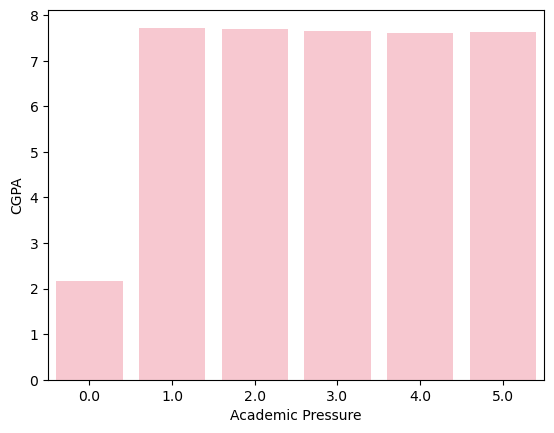

In [30]:
sns.barplot(x=academic['Academic Pressure'],y=academic['CGPA'],color='pink')
plt.show()

In [23]:
sleep = df.groupby(['Sleep Duration'])['CGPA'].mean().reset_index()

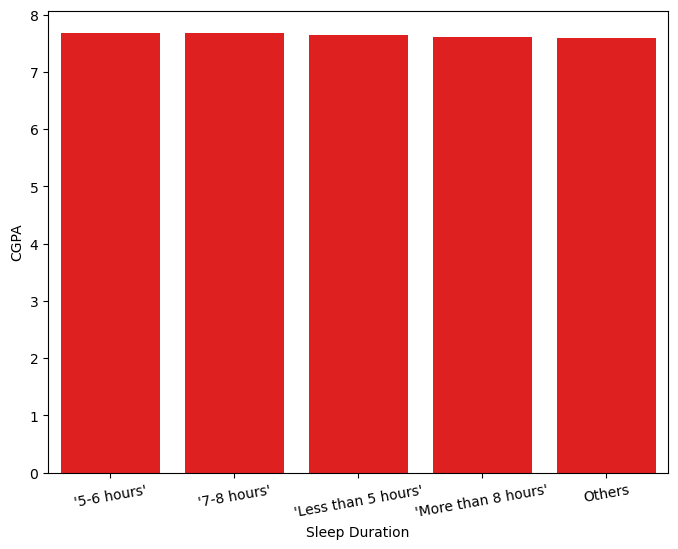

In [43]:
plt.figure(figsize=(8,6))

sns.barplot(x=sleep['Sleep Duration'],y=sleep['CGPA'],color='red')
plt.xticks(rotation=10)
plt.show()


In [50]:
work = df.groupby(['Degree'])['Work/Study Hours'].mean().reset_index()
work


,Degree,Work/Study Hours
0,'Class 12',7.278289
1,B.Arch,7.266576
2,B.Com,7.227756
3,B.Ed,7.164971
4,B.Pharm,6.708642
5,B.Tech,7.070312
6,BA,7.195000
7,BBA,7.031609
8,BCA,7.226797
9,BE,7.161501


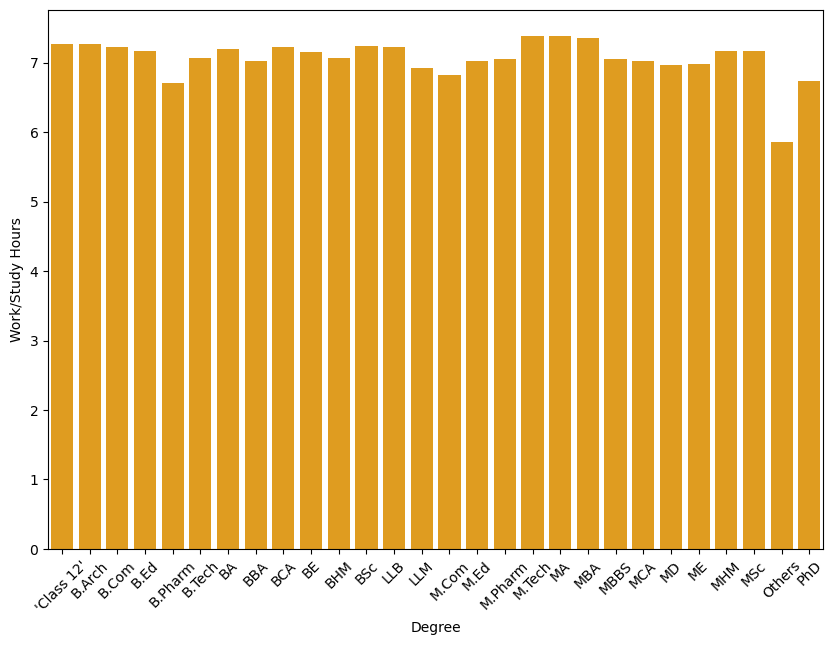

In [61]:
plt.figure(figsize=(10,7))
sns.barplot(x=work['Degree'],y=work['Work/Study Hours'],color='orange')
plt.xticks(rotation=45)
plt.show()

In [63]:
job = df.groupby(['Job Satisfaction'])['Work/Study Hours'].mean().reset_index()
job

,Job Satisfaction,Work/Study Hours
0,0.0,7.157351
1,1.0,6.000000
2,2.0,5.333333
3,3.0,8.000000
4,4.0,5.500000


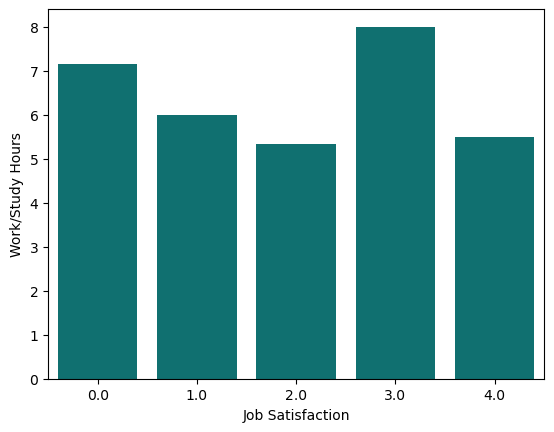

In [66]:
sns.barplot(x=job['Job Satisfaction'],y=job['Work/Study Hours'],color='teal')
plt.show()

In [74]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


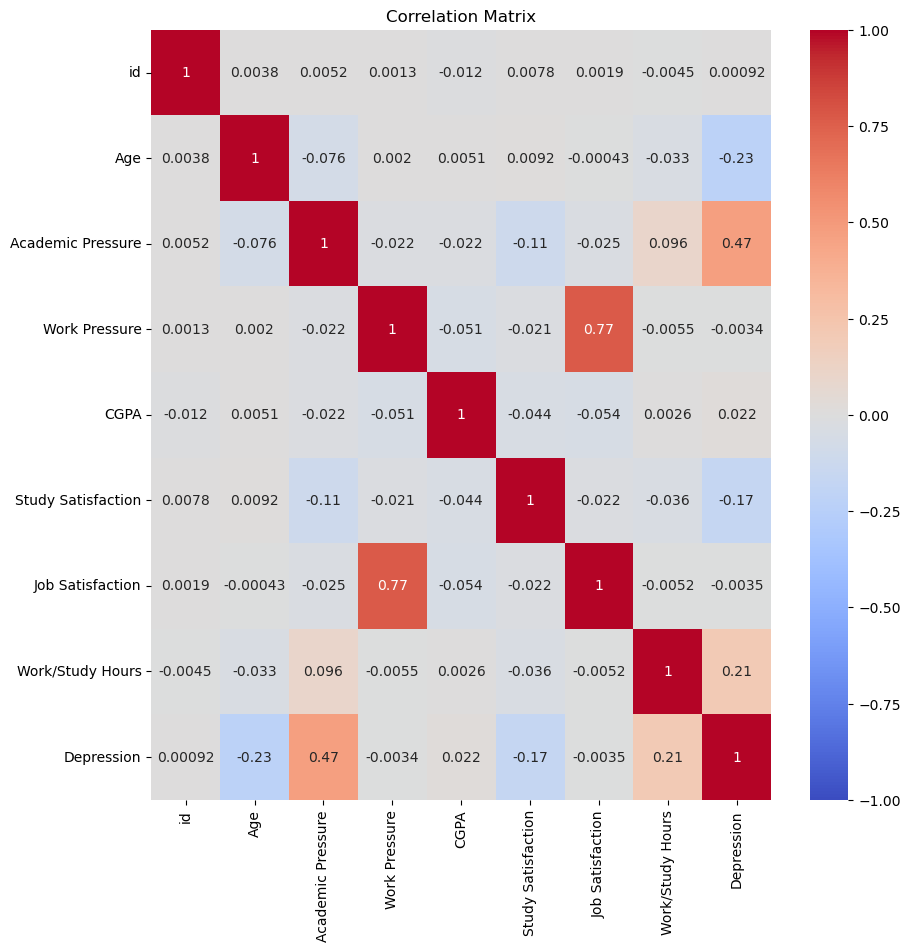

In [73]:
num_cols = df.select_dtypes(['int64','float64']).columns.tolist()
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, vmin = -1, vmax = 1, cmap='coolwarm',annot=True)
plt.title('Correlation Matrix')
plt.show()